# Task 2.2
## Gaussian Mixture Models

### Exploracion y preprocesamiento del dataset

**Importar librerias necesarias**

In [1]:
import numpy as np
import pandas as pd

C:\Users\diego\AppData\Local\Temp\ipykernel_31956\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Cargar el dataset**

In [2]:
full_df = pd.read_csv("bank_transactions.csv",sep=",")
df = full_df.sample(n=1000, random_state=42)

**Estructura y composicion del dataset**

In [3]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
892845,T892846,C5725279,8/9/84,M,JASPUR,84447.82,7/9/16,183210,11858.0
444994,T444995,C4588538,2/1/94,M,GURGAON,12549.49,16/8/16,161300,250.0
614896,T614897,C2416476,14/11/90,M,NEW DELHI,33607.65,26/8/16,102007,3360.0
457036,T457037,C5940151,15/9/90,M,HYDERABAD,38238.86,21/8/16,110438,250.0
997441,T997442,C5922989,27/11/88,M,PURBO MEDINIPUR,9506.85,14/9/16,90810,33.0


In [4]:
df.tail()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
687135,T687136,C4420786,27/4/87,M,GURGAON,44152.85,31/8/16,214235,420.0
641030,T641031,C6142473,1/11/75,M,KOLKATA,10026.44,25/8/16,194834,499.0
408194,T408195,C5631770,5/12/88,F,AHMEDABAD,21335.25,18/8/16,231859,68.0
810207,T810208,C8916738,11/11/92,F,DELHI,6688.57,5/9/16,233351,259.0
341759,T341760,C7714974,1/1/1800,F,BHOPAL,6406304.47,15/8/16,201952,3936.0


In [5]:
df.shape

(1000, 9)

**Caracteristicas del dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 892845 to 341759
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            1000 non-null   object 
 1   CustomerID               1000 non-null   object 
 2   CustomerDOB              995 non-null    object 
 3   CustGender               1000 non-null   object 
 4   CustLocation             1000 non-null   object 
 5   CustAccountBalance       994 non-null    float64
 6   TransactionDate          1000 non-null   object 
 7   TransactionTime          1000 non-null   int64  
 8   TransactionAmount (INR)  1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 78.1+ KB


**Estadisticas descriptivas**

In [7]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,9.940000e+02,1000.00000,1000.000000
mean,9.923772e+04,156071.56000,1753.337190
std,3.941778e+05,52430.20566,5853.874146
min,0.000000e+00,1.00000,0.000000
25%,4.944843e+03,123311.25000,169.750000
50%,1.586093e+04,165135.00000,459.500000
75%,5.430488e+04,195150.75000,1285.180000
max,6.406304e+06,235804.00000,107000.040000


**Conteo de valores unicos en variables categoricas**

In [8]:
df['CustGender'].value_counts()

CustGender
M    734
F    266
Name: count, dtype: int64

In [9]:
df['CustLocation'].value_counts()

CustLocation
MUMBAI       95
BANGALORE    89
NEW DELHI    84
GURGAON      70
DELHI        59
             ..
BHANDARA      1
SIRMAUR       1
VAPI          1
MARGAO        1
BATHINDA      1
Name: count, Length: 275, dtype: int64

**Seleccion de Features**

In [10]:
features = df.drop(['TransactionID', 'CustomerID','CustomerDOB','TransactionDate'], axis=1)

**Busqueda y manejo de valores nulos**

In [11]:
features.isnull().sum()

CustGender                 0
CustLocation               0
CustAccountBalance         6
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [12]:
features = features.dropna()

**Encoding de features categoricas**

In [13]:
# Encoding para genero
features['CustGender'] = features['CustGender'].apply(lambda x: 1 if x == 'F' else 0)

# Calcular frecuencia de cada ubicación
location_freq = features['CustLocation'].value_counts(normalize=True)

# Mapear la frecuencia de cada ubicación al dataset
features['CustLocation_FreqEncoded'] = features['CustLocation'].map(location_freq)

# Eliminar la columna original de CustLocation si ya no es necesaria
features.drop(columns=['CustLocation'], inplace=True)

# Rellenar los nulos con 0
# features['CustLocation_FreqEncoded'] = features['CustLocation_FreqEncoded'].fillna(0)

# Cambiar a nombre original
features.rename(columns={"CustLocation_FreqEncoded":"CustLocation"}, inplace=True)

**Verificacion**

In [14]:
features.isnull().sum()

CustGender                 0
CustAccountBalance         0
TransactionTime            0
TransactionAmount (INR)    0
CustLocation               0
dtype: int64

In [15]:
features['CustGender'].value_counts()

CustGender
0    730
1    264
Name: count, dtype: int64

In [16]:
features['CustLocation'].value_counts()

CustLocation
0.001006    193
0.095573     95
0.089537     89
0.083501     83
0.070423     70
0.003018     69
0.059356     59
0.002012     56
0.015091     45
0.033199     33
0.029175     29
0.024145     24
0.004024     24
0.020121     20
0.005030     20
0.017103     17
0.014085     14
0.013078     13
0.006036     12
0.012072     12
0.010060     10
0.007042      7
Name: count, dtype: int64

**Escalado de features**

In [17]:
from sklearn.preprocessing import MinMaxScaler
features.drop(columns=['CustLocation'], inplace=True)
features.drop(columns=['CustGender'], inplace=True)
# features.drop(columns=['TransactionTime'], inplace=True)
# features.drop(columns=['TransactionAmount (INR)'], inplace=True)

# Seleccionar las features a escalar
numeric_features = features.select_dtypes(include=['float64', 'int64'])

# Inicializar el objeto StandardScaler
scaler = MinMaxScaler()

# Escalar las features
scaled_features = scaler.fit_transform(numeric_features)

# Reemplazar las features originales por las features escaladas
features[numeric_features.columns] = scaled_features

In [18]:
features.head()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
892845,0.013182,0.776958,0.110822
444994,0.001959,0.684041,0.002336
614896,0.005246,0.432590,0.031402
457036,0.005969,0.468344,0.002336
997441,0.001484,0.385105,0.000308


In [19]:
features.tail()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
687135,0.006892,0.908530,0.003925
641030,0.001565,0.826253,0.004664
408194,0.003330,0.983270,0.000636
810207,0.001044,0.989597,0.002421
341759,1.000000,0.856439,0.036785


## Gaussian Mixture Model

In [20]:
features_np = features.to_numpy()

**Version cutre**

In [21]:
import numpy as np

class GMM:
    def __init__(self, n_components, max_iter=100, comp_names=None):
        self.n_componets = n_components
        self.max_iter = max_iter
        self.comp_names = [f"{index}" for index in range(self.n_componets)] if comp_names is None else comp_names
        self.pi = [1 / self.n_componets for _ in range(self.n_componets)]

    def multivariate_normal(self, X, mean_vector, covariance_matrix):
        return (2 * np.pi) ** (-len(X) / 2) * np.linalg.det(covariance_matrix) ** (-1 / 2) * np.exp(-np.dot(np.dot((X - mean_vector).T, np.linalg.inv(covariance_matrix)), (X - mean_vector)) / 2)

    def fit(self, X):
        new_X = np.array_split(X, self.n_componets)
        self.mean_vector = [np.mean(x, axis=0) for x in new_X]
        self.covariance_matrixes = [np.cov(x.T) + np.eye(x.shape[1]) * 1e-6 for x in new_X]
        del new_X
        
        for _ in range(self.max_iter):
            self.r = np.zeros((len(X), self.n_componets))
            for n in range(len(X)):
                for k in range(self.n_componets):
                    prob = self.pi[k] * self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
                    self.r[n][k] = prob / (sum([self.pi[j] * self.multivariate_normal(X[n], self.mean_vector[j], self.covariance_matrixes[j]) for j in range(self.n_componets)]) + 1e-9)
            
            N = np.sum(self.r, axis=0)
            
            self.mean_vector = np.zeros((self.n_componets, len(X[0])))
            for k in range(self.n_componets):
                for n in range(len(X)):
                    self.mean_vector[k] += self.r[n][k] * X[n]
                self.mean_vector[k] = 1 / N[k] * self.mean_vector[k]
            
            self.covariance_matrixes = [np.zeros((len(X[0]), len(X[0]))) for k in range(self.n_componets)]
            for k in range(self.n_componets):
                self.covariance_matrixes[k] = np.cov(X.T, aweights=(self.r[:, k]), ddof=0) + np.eye(len(X[0])) * 1e-6
                self.covariance_matrixes[k] = 1 / N[k] * self.covariance_matrixes[k]
            
            self.pi = [N[k] / len(X) for k in range(self.n_componets)]

    def predict(self, X):
        probas = []
        for n in range(len(X)):
            probas.append([self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k]) for k in range(self.n_componets)])
        cluster = []
        for proba in probas:
            cluster.append(self.comp_names[proba.index(max(proba))])
        return cluster


In [22]:
# Asumiendo que X es tu array de NumPy con los datos preprocesados

# Paso 2: Inicializar el modelo GMM
n_components = 3  # Elige el número de clusters deseado
gmm = GMM(n_components=n_components)

# Paso 3: Entrenar el modelo con tus datos
gmm.fit(features_np)

# Paso 4: Asignar clusters a los datos
clusters = gmm.predict(features_np)

In [23]:
from sklearn.decomposition import PCA

# Asumiendo que X es tu conjunto de datos original

# Inicializa PCA para reducir a 2 dimensiones
pca = PCA(n_components = 2)

# Ajusta PCA a los datos y transforma los datos a 2D
X_2d = pca.fit_transform(features_np)


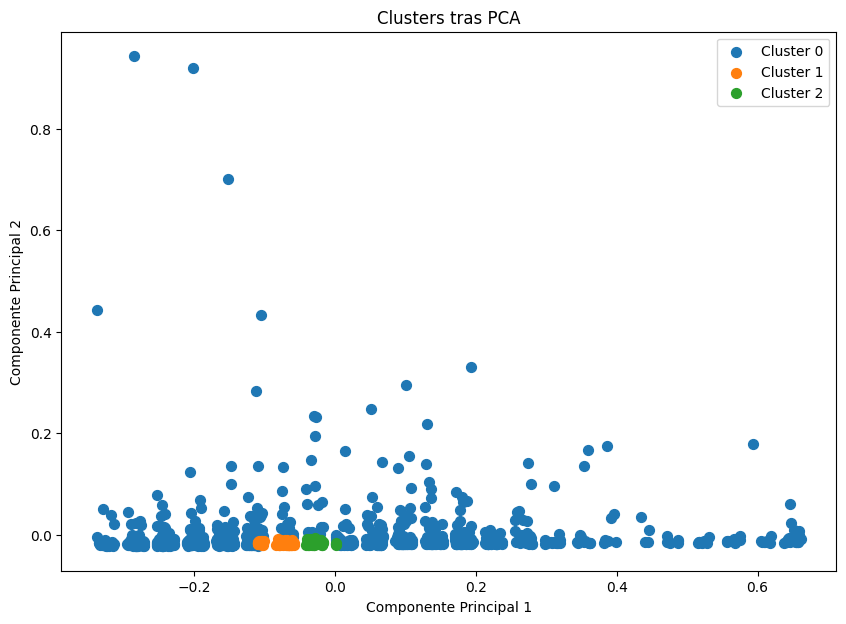

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que 'clusters' contiene las etiquetas de cluster devueltas por tu modelo GMM

# Convierte las etiquetas de cluster en un array de NumPy para facilitar el manejo
cluster_labels = np.array(clusters)

# Extrae las dos componentes principales para graficar
feature_1 = X_2d[:, 0]  # Primera componente principal
feature_2 = X_2d[:, 1]  # Segunda componente principal

# Crea una figura y un eje para el gráfico
plt.figure(figsize=(10, 7))

# Grafica cada cluster con un color diferente
for cluster in np.unique(cluster_labels):
    plt.scatter(feature_1[cluster_labels == cluster], feature_2[cluster_labels == cluster], label=f'Cluster {cluster}', s=50)

# Títulos y etiquetas
plt.title('Clusters tras PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Leyenda
plt.legend()

# Muestra el gráfico
plt.show()
